<a href="https://colab.research.google.com/github/IAMLATI/Firstproj/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision 
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader


In [2]:
# config device
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [3]:
#hyperparameters
input_size=784
hidden_size=100
num_classes=10
num_epochs=2
batch_size=100
learning_rate=0.03

In [4]:
#import dataset
train_dataset=torchvision.datasets.MNIST(root='./', train=True, transform=transforms.ToTensor(), download=True)

test_dataset=torchvision.datasets.MNIST(root='./', train=False, transform=transforms.ToTensor() )

train_loader=DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader=DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


In [5]:
examples=iter(train_loader)
samples, labels=next(examples)
print(samples.shape,labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


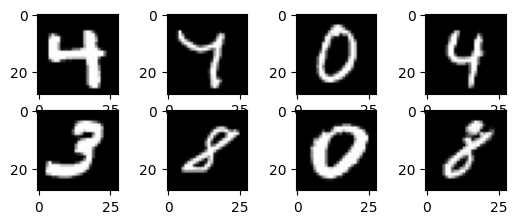

In [6]:
for i in range(8):
  plt.subplot(4,4,i+1)
  plt.imshow(samples[i][0], cmap='gray')

In [7]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.l2=nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    out=self.l1(x)
    out=self.relu(out)
    out=self.l2(out)

    return out

model=NeuralNet(input_size, hidden_size, num_classes)

In [8]:
#loss_function
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate )

In [9]:
#training_loop
n_total_steps= len(train_loader)
for epoch in range (num_epochs):
  for i, (images, labels) in enumerate(train_loader):

      
    images=images.reshape(-1, 28*28).to(device)
    labels=labels.to(device)

    outputs=model(images)
    loss=criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if (i+1)%100==0:
      print(f'epoch{epoch+1}/{num_epochs}, step{i+1}/{n_total_steps}, loss{loss.item():.4f}')

epoch1/2, step100/600, loss0.0908
epoch1/2, step200/600, loss0.0761
epoch1/2, step300/600, loss0.3378
epoch1/2, step400/600, loss0.1336
epoch1/2, step500/600, loss0.1134
epoch1/2, step600/600, loss0.0663
epoch2/2, step100/600, loss0.1036
epoch2/2, step200/600, loss0.2106
epoch2/2, step300/600, loss0.1667
epoch2/2, step400/600, loss0.5903
epoch2/2, step500/600, loss0.2240
epoch2/2, step600/600, loss0.3145


In [11]:
#test_loop
with torch.no_grad():
  n_correct=0
  n_samples=0
  for images, labels in test_loader:
    images=images.reshape(-1, 28*28).to(device)
    labels=labels.to(device)

    outputs=model(images)

    _, predictions=torch.max(outputs,1)
    n_samples+=labels.shape[0]
    n_correct+=(predictions==labels).sum().item()

  acc=100.0* n_correct/n_samples
  print(f'accuracy{acc}')


accuracy94.76
